In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd 
import pvlib
import numpy as np
from pvlib import clearsky, atmosphere, solarposition
from pvlib.location import Location
from pvlib.pvsystem import PVSystem
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

from matplotlib import rcParams


rcParams['figure.figsize'] = 20, 6
rcParams['lines.linewidth'] = 2.5

In [2]:

df_prod = pd.read_csv('/Users/yaizabermudez/internship/data_stage/prod.csv', parse_dates=True, index_col='Unnamed: 0')

In [3]:
df_prod

,Auto-Production (Pourcentage),Production PV ombriere instantanee reelle (kW),Production PV toiture instantanee reelle (kW),Production PV totale (kW),Compteur SEPAM (kW)
2022-09-10 00:00:00+00:00,0.00,0.00,0.00,0.00,107.0
2022-09-10 00:10:00+00:00,0.00,0.00,0.00,0.00,104.0
2022-09-10 00:20:00+00:00,0.00,0.00,0.00,0.00,111.0
2022-09-10 00:30:00+00:00,0.00,0.00,0.00,0.00,107.0
2022-09-10 00:40:00+00:00,0.00,0.00,0.00,0.00,118.0
...,...,...,...,...,...
2023-06-07 09:50:00+00:00,29.05,2.36,95.50,97.86,239.0
2023-06-07 10:00:00+00:00,38.89,4.11,103.44,107.55,169.0
2023-06-07 10:10:00+00:00,43.62,7.80,109.82,117.62,152.0
2023-06-07 10:20:00+00:00,48.80,10.22,110.81,121.03,127.0


In [4]:
df_roof = df_prod[' Production PV toiture instantanee reelle (kW)']

In [5]:
df_roof.index

DatetimeIndex(['2022-09-10 00:00:00+00:00', '2022-09-10 00:10:00+00:00',
               '2022-09-10 00:20:00+00:00', '2022-09-10 00:30:00+00:00',
               '2022-09-10 00:40:00+00:00', '2022-09-10 00:50:00+00:00',
               '2022-09-10 01:00:00+00:00', '2022-09-10 01:10:00+00:00',
               '2022-09-10 01:20:00+00:00', '2022-09-10 01:30:00+00:00',
               ...
               '2023-06-07 09:00:00+00:00', '2023-06-07 09:10:00+00:00',
               '2023-06-07 09:20:00+00:00', '2023-06-07 09:30:00+00:00',
               '2023-06-07 09:40:00+00:00', '2023-06-07 09:50:00+00:00',
               '2023-06-07 10:00:00+00:00', '2023-06-07 10:10:00+00:00',
               '2023-06-07 10:20:00+00:00', '2023-06-07 10:30:00+00:00'],
              dtype='datetime64[ns, UTC]', length=38944, freq=None)

In [6]:
data_frame_roof = df_roof.copy()
data_frame_roof = data_frame_roof.resample('1H').mean().interpolate(method='time')

In [7]:
data_frame_roof.index

DatetimeIndex(['2022-09-10 00:00:00+00:00', '2022-09-10 01:00:00+00:00',
               '2022-09-10 02:00:00+00:00', '2022-09-10 03:00:00+00:00',
               '2022-09-10 04:00:00+00:00', '2022-09-10 05:00:00+00:00',
               '2022-09-10 06:00:00+00:00', '2022-09-10 07:00:00+00:00',
               '2022-09-10 08:00:00+00:00', '2022-09-10 09:00:00+00:00',
               ...
               '2023-06-07 01:00:00+00:00', '2023-06-07 02:00:00+00:00',
               '2023-06-07 03:00:00+00:00', '2023-06-07 04:00:00+00:00',
               '2023-06-07 05:00:00+00:00', '2023-06-07 06:00:00+00:00',
               '2023-06-07 07:00:00+00:00', '2023-06-07 08:00:00+00:00',
               '2023-06-07 09:00:00+00:00', '2023-06-07 10:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=6491, freq='H')

In [8]:
df_onduleur = pd.read_csv('/Users/yaizabermudez/internship/data_stage/pv_inverters_energy (1).csv',parse_dates=True, index_col='Unnamed: 0')
# df_onduleur.columns = ['Time',	'Onduleur A: energie totale (MWh)',	'Onduleur B: energie totale (MWh)',	'Onduleur C: energie totale (MWh)',	'Onduleur D-A: energie totale (MWh)',	'Onduleur D-B: energie totale (MWh)',	'Onduleur: energie totale (MWh)']


In [9]:
df_onduleur = df_onduleur.resample('1H').mean().interpolate(method='time')

In [10]:
df_onduleur

,Onduleur A: energie totale (MWh),Onduleur B: energie totale (MWh),Onduleur C: energie totale (MWh),Onduleur D-A: energie totale (MWh),Onduleur D-B: energie totale (MWh),Onduleur: energie totale (MWh)
2022-08-25 14:00:00+00:00,0.231450,0.282384,0.362471,0.236141,0.238329,75.175000
2022-08-25 15:00:00+00:00,0.231450,0.293090,0.383303,0.246886,0.249027,73.002167
2022-08-25 16:00:00+00:00,0.231450,0.307727,0.409398,0.261697,0.263594,68.506000
2022-08-25 17:00:00+00:00,0.231450,0.321035,0.429374,0.276198,0.276111,40.477667
2022-08-25 18:00:00+00:00,0.231450,0.324791,0.434339,0.279761,0.278956,0.000000
...,...,...,...,...,...,...
2023-06-05 17:00:00+00:00,29.960928,21.267881,31.662329,20.981410,21.208082,125.066165
2023-06-05 18:00:00+00:00,29.980819,21.282091,31.682883,20.997460,21.220813,125.150499
2023-06-05 19:00:00+00:00,29.993439,21.291126,31.696045,21.008609,21.228425,125.203500
2023-06-05 20:00:00+00:00,29.998252,21.294680,31.701090,21.013431,21.230962,125.224997


## Physical model

In [11]:
lat = 45.20 # Latitude Grenoble
lon = 5.70 # Longitude Grenoble
# tz =  'Europe/Paris'
# tz = 'Asia/Qatar'
altitude = 212


In [12]:
start = '2022-09-10 00'
end = '2023-06-01 00'



In [13]:
data_frame_roof = data_frame_roof.loc[data_frame_roof.index <= end]
data_frame_roof = data_frame_roof.loc[data_frame_roof.index >= start]
real  = data_frame_roof.values

times = pd.date_range(start, end, freq='1H',tz = 'Europe/Paris')

def physical_val(lat=45.20, lon=5.7, altitude=212, times = times):

    # create location object and get clearsky data
    site_location = Location(lat, lon, tz = 'Europe/Paris',altitude = altitude, name='Grenoble')

    #compute solar position trough times 
    solar_position = site_location.get_solarposition(times)

    # Compute absolute airmass
    airmass_relative  = pvlib.atmosphere.get_relative_airmass(solar_position['zenith'])
    airmass_absolute = pvlib.atmosphere.get_absolute_airmass(airmass_relative)

    # Compute aoi
    incidence_angle = pvlib.irradiance.aoi(surface_tilt=6, surface_azimuth= 139, solar_zenith= solar_position['zenith'], 
                            solar_azimuth= solar_position['azimuth'])
    
    return solar_position,airmass_relative, airmass_absolute, incidence_angle, site_location





In [37]:
s_position, airmass_r, airmass_a, angle, location = physical_val()

In [15]:
def calcule_pred(model_clear_sky, solar_position, airmass_absolute, incidence_angle, site_location, power=183, model_irrad = 'haydavies', tilt=6, angle=139): 
    # cs = site_location.get_clearsky(times)
    module = pvlib.pvsystem.retrieve_sam('SandiaMod')['Schott_Solar_ASE_300_DGF_50__320___2007__E__']
    cec_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')['ABB__MICRO_0_25_I_OUTD_US_208__208V_']

    temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']
    
    sapm_system = PVSystem(
    surface_tilt= tilt, 
    surface_azimuth= angle,
    module_parameters=module,
    inverter_parameters=cec_inverters,
    temperature_model_parameters=temperature_model_parameters)
    # print(sapm_system)
    
    irradiance = PVSystem.get_irradiance(sapm_system, solar_position['zenith'], solar_position['azimuth'], model_clear_sky['dni'], model_clear_sky['ghi'], model_clear_sky['dhi'], model=model_irrad)

   
    # Compute effective irradiance
    effective_irradiance = pvlib.pvsystem.sapm_effective_irradiance(irradiance['poa_direct'], irradiance['poa_diffuse'], airmass_absolute, 
                                                  incidence_angle, module )

    # celltemp = pvlib.pvsystem.sapm_celltemp(irradiance['poa_direct'], wind, temperature)
    m_pow = (module["Impo"] * module["Vmpo"]) 
    
    df_pred=solar_position.copy()

    pv_produced = pvlib.pvsystem.sapm(effective_irradiance, 25, module)
    pv_produced ["p_mp"] = (pv_produced ["p_mp"]* power)/(m_pow/1000) 

    pv_produced ["p_mp"] /=1000  # kWh

    df_pred['power'] = pv_produced['p_mp']

    df_pred = df_pred.loc[df_pred.index >= start]
    df_pred = df_pred.loc[df_pred.index <= end]
    df_pred = df_pred['power']
    

    return df_pred

First model using ineichen for clearsky

In [38]:
linke_turbidity = pvlib.clearsky.lookup_linke_turbidity(times, lat, lon, filepath=None, interp_turbidity=True)

In [39]:
model_ineichen= pvlib.clearsky.ineichen(s_position['apparent_zenith'], airmass_a, linke_turbidity, altitude=212, dni_extra=1364.0, perez_enhancement=False)

In [40]:
df_pred = calcule_pred(model_ineichen, s_position, airmass_a, angle, location )

In [ ]:
df_pred.index = pd.to_datetime(df_pred.index, format ='%Y-%m-%d %H:%M:%S') 
df_pred =df_pred.tz_convert('Europe/Paris').tz_localize(None)


In [ ]:
# df_pred.to_csv('Ineichen_clear-sky_model.csv')

In [25]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as APE
pred = df_pred.values
testScore = np.sqrt(MSE(real, pred))
print('Test Score: %.2f RMSE' % (testScore))
print('RMSE en % : ', testScore*100/real.max())
test_mae = MAE(real, pred) 
print("MAE : ",test_mae)
test_mape = MAPE(real, pred) 
print("MAPE : ",test_mape)
test_ape = APE(real, pred) 
print("R2 : ",test_ape)


Test Score: 28.34 RMSE
RMSE en % :  19.337652660071473
MAE :  14.487583808589998
MAPE :  510716965272963.75
R2 :  0.09883238948047501


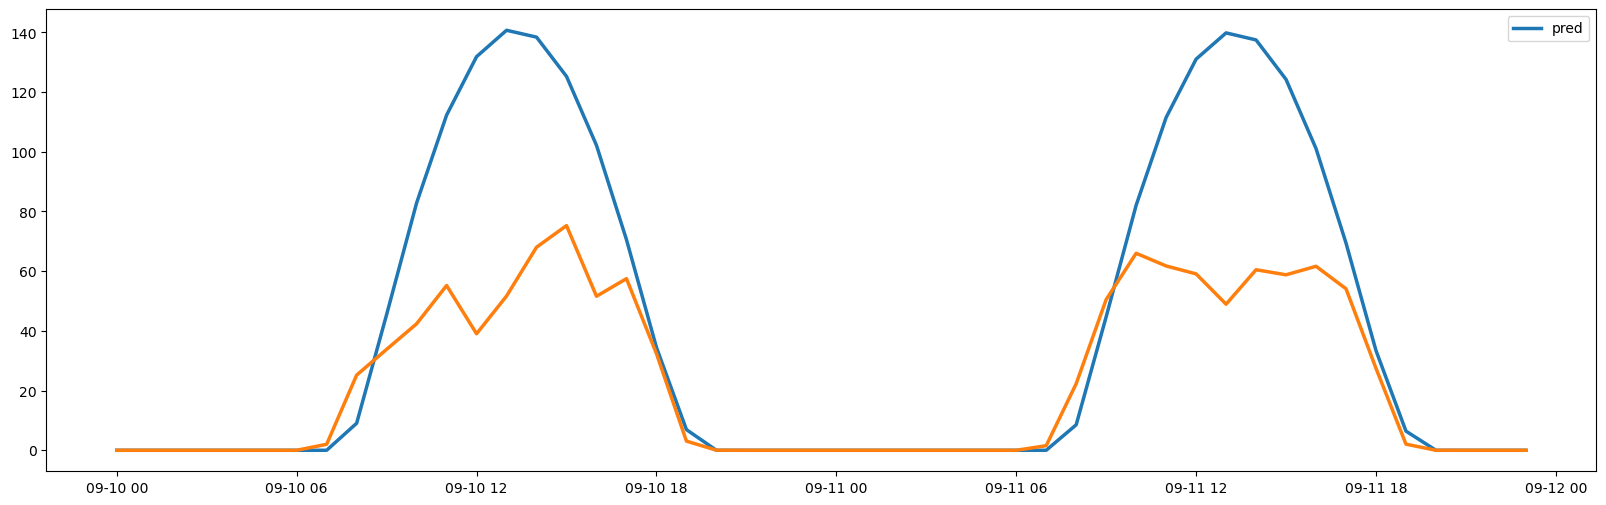

In [26]:
plt.plot(df_pred[:48], label = 'pred')
plt.plot(data_frame_roof[:48])
plt.legend()
plt.show()

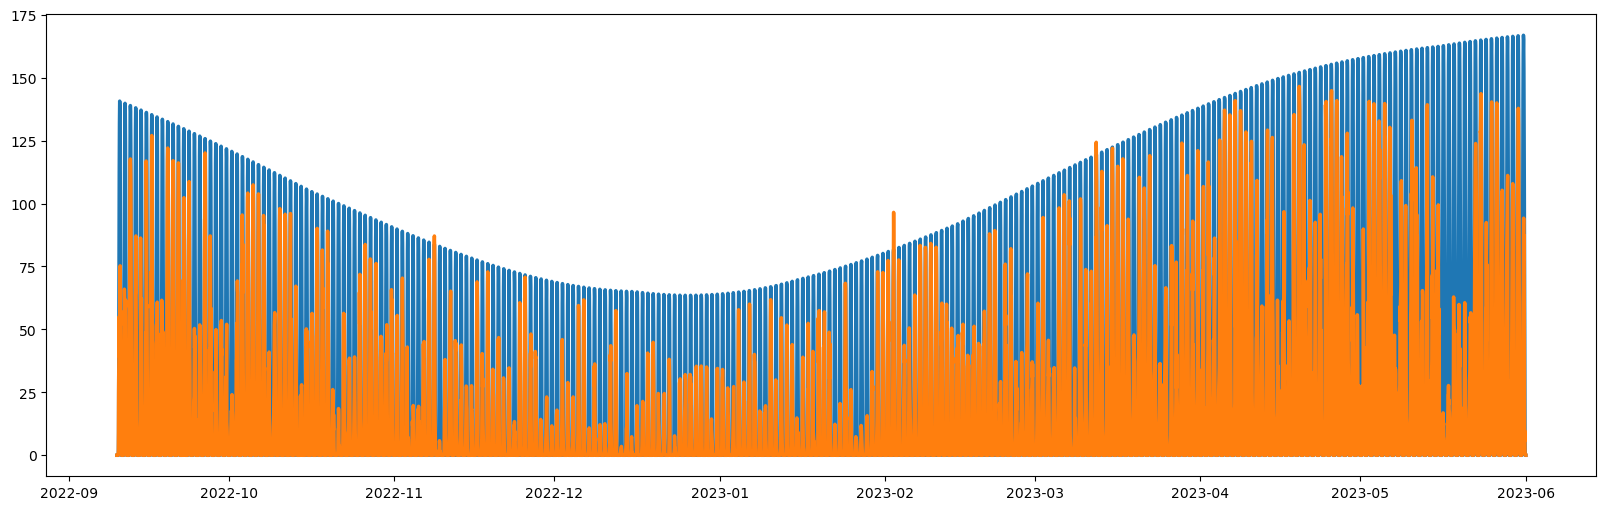

In [22]:
plt.plot(df_pred)
plt.plot(data_frame_roof)
plt.show()

avec perez irrad model

In [23]:
model_irradiance = 'perez'

In [24]:
df_pred = calcule_pred(model_ineichen, s_position, airmass_a, angle, location, model_irrad= model_irradiance )
df_pred.index = pd.to_datetime(df_pred.index, format ='%Y-%m-%d %H:%M:%S') 
df_pred =df_pred.tz_convert('Europe/Paris').tz_localize(None)
pred = df_pred.values

In [25]:
testScore = np.sqrt(MSE(real, pred))
print('Test Score: %.2f RMSE' % (testScore))
print('RMSE en % : ', testScore*100/real.max())
test_mae = MAE(real, pred) 
print("MAE : ",test_mae)
test_mape = MAPE(real, pred) 
print("MAPE : ",test_mape)
test_ape = APE(real, pred) 
print("R2 : ",test_ape)

Test Score: 28.55 RMSE
RMSE en % :  19.48291806114746
MAE :  14.605718177997598
MAPE :  507975868092883.0
R2 :  0.08524230467044125


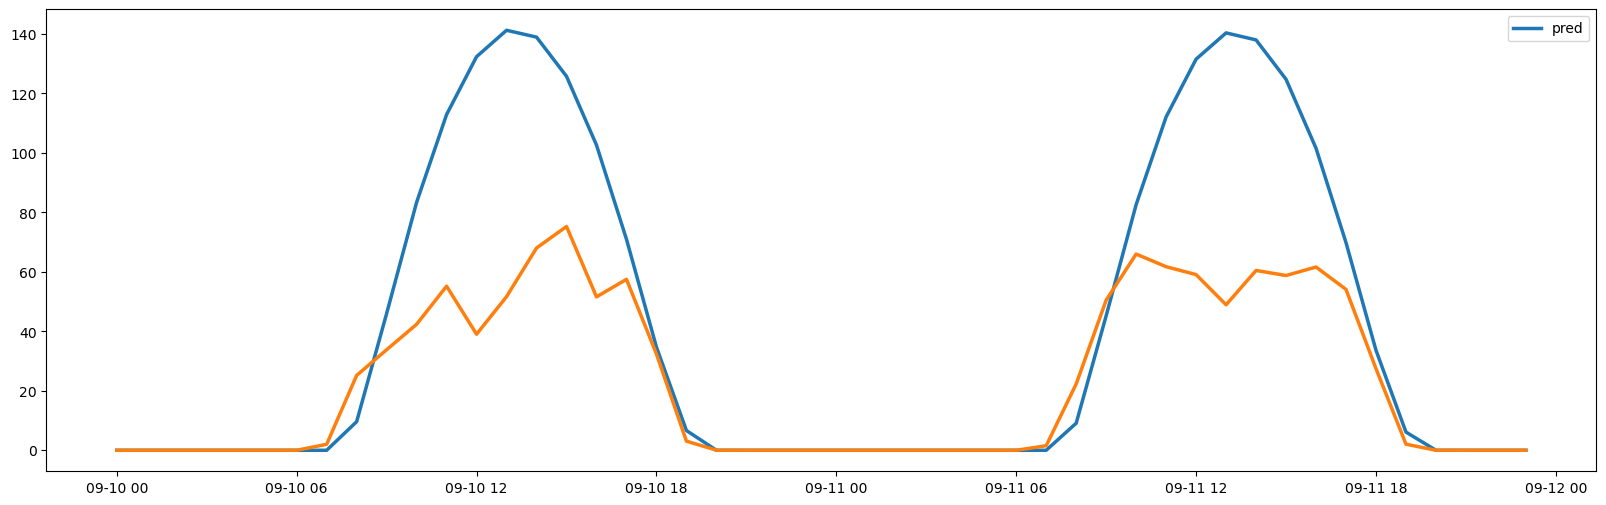

In [26]:
plt.plot(df_pred[:48], label = 'pred')
plt.plot(data_frame_roof[:48])
plt.legend()
plt.show()

In [27]:
model_irradiance = 'isotropic'

In [28]:
df_pred = calcule_pred(model_ineichen, s_position, airmass_a, angle, location, model_irrad= model_irradiance)
df_pred.index = pd.to_datetime(df_pred.index, format ='%Y-%m-%d %H:%M:%S') 
df_pred =df_pred.tz_convert('Europe/Paris').tz_localize(None)
pred = df_pred.values

In [29]:
testScore = np.sqrt(MSE(real, pred))
print('Test Score: %.2f RMSE' % (testScore))
print('RMSE en % : ', testScore*100/real.max())
test_mae = MAE(real, pred) 
print("MAE : ",test_mae)
test_mape = MAPE(real, pred) 
print("MAPE : ",test_mape)
test_ape = APE(real, pred) 
print("R2 : ",test_ape)

Test Score: 28.02 RMSE
RMSE en % :  19.123513293466566
MAE :  14.31787023056568
MAPE :  508889492968687.06
R2 :  0.11868040190475992


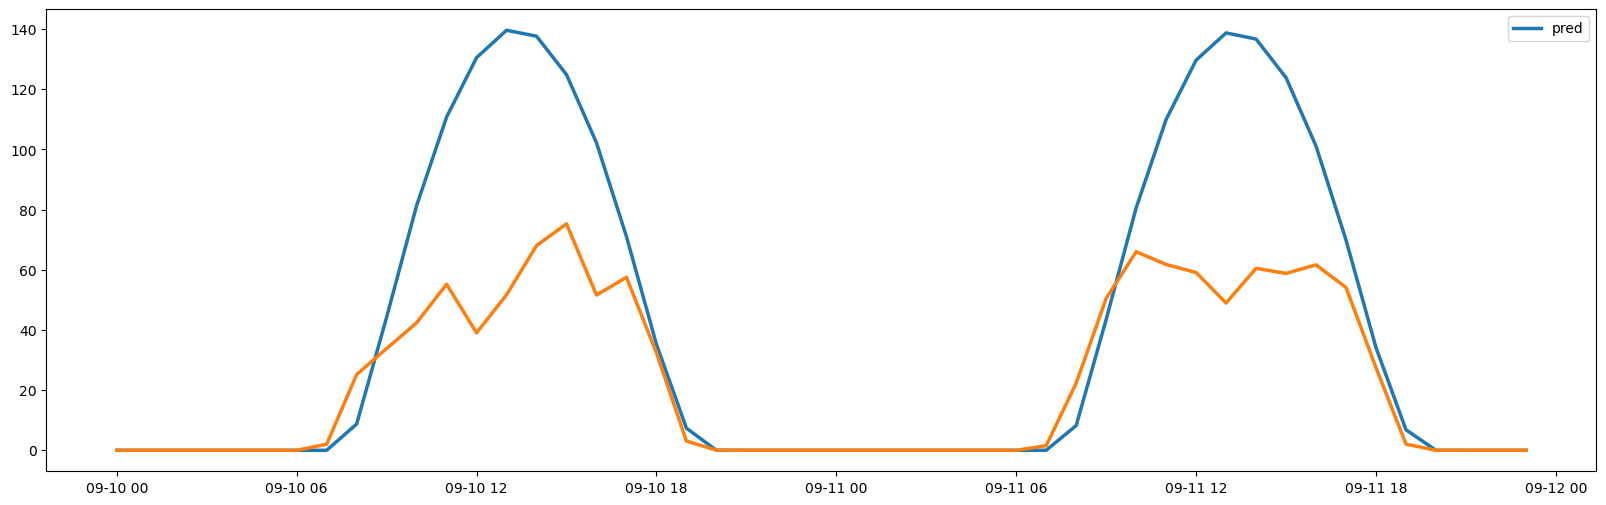

In [30]:
plt.plot(df_pred[:48], label = 'pred')
plt.plot(data_frame_roof[:48])
plt.legend()
plt.show()

In [31]:
model_irradiance = 'klucher'

In [32]:
df_pred = calcule_pred(model_ineichen, s_position, airmass_a, angle, location, model_irrad= model_irradiance )
df_pred.index = pd.to_datetime(df_pred.index, format ='%Y-%m-%d %H:%M:%S') 
df_pred =df_pred.tz_convert('Europe/Paris').tz_localize(None)
pred = df_pred.values

In [33]:

testScore = np.sqrt(MSE(real, pred))
print('Test Score: %.2f RMSE' % (testScore))
print('RMSE en % : ', testScore*100/real.max())
test_mae = MAE(real, pred) 
print("MAE : ",test_mae)
test_mape = MAPE(real, pred) 
print("MAPE : ",test_mape)
test_ape = APE(real, pred) 
print("R2 : ",test_ape)

Test Score: 29.46 RMSE
RMSE en % :  20.10777623082702
MAE :  15.171414844869206
MAPE :  523649530364100.9
R2 :  0.02562495930961406


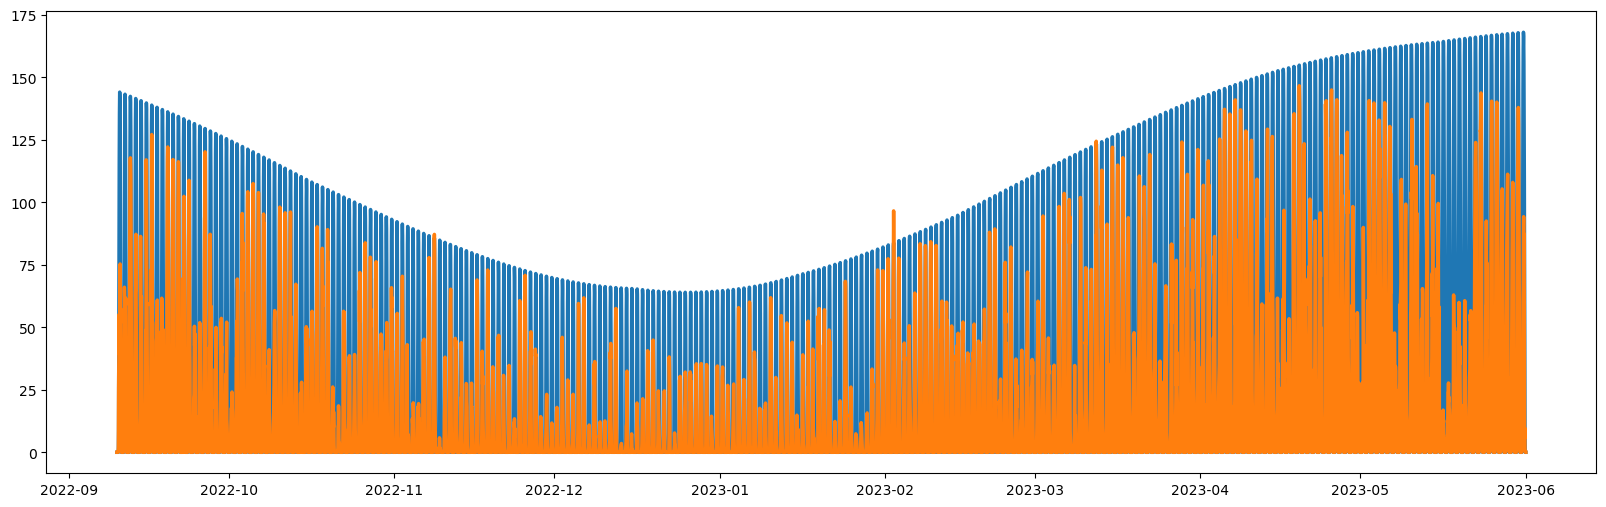

In [34]:
plt.plot(df_pred)
plt.plot(data_frame_roof)
plt.show()

Second model using simplified solis for clear sky

In [35]:
model_solis = pvlib.clearsky.simplified_solis(s_position['apparent_elevation'], aod700=0.1, precipitable_water=1.0, pressure=101325.0, dni_extra=1364.0)

In [36]:
df_pred = calcule_pred(model_solis, s_position, airmass_a, angle, location )
df_pred.index = pd.to_datetime(df_pred.index, format ='%Y-%m-%d %H:%M:%S') 
df_pred =df_pred.tz_convert('Europe/Paris').tz_localize(None)
pred = df_pred.values

In [37]:
testScore = np.sqrt(MSE(real, pred))
print('Test Score: %.2f RMSE' % (testScore))
print('RMSE en % : ', testScore*100/real.max())
test_mae = MAE(real, pred) 
print("MAE : ",test_mae)
test_mape = MAPE(real, pred) 
print("MAPE : ",test_mape)
test_ape = APE(real, pred) 
print("R2 : ",test_ape)

Test Score: 33.74 RMSE
RMSE en % :  23.022880332258715
MAE :  17.900224393164414
MAPE :  795142236103424.2
R2 :  -0.27737195197828934


In [38]:
model_irradiance = 'perez'

In [39]:
df_pred = calcule_pred(model_solis, s_position, airmass_a, angle, location, model_irrad= model_irradiance )
df_pred.index = pd.to_datetime(df_pred.index, format ='%Y-%m-%d %H:%M:%S') 
df_pred =df_pred.tz_convert('Europe/Paris').tz_localize(None)
pred = df_pred.values

In [40]:
testScore = np.sqrt(MSE(real, pred))
print('Test Score: %.2f RMSE' % (testScore))
print('RMSE en % : ', testScore*100/real.max())
test_mae = MAE(real, pred) 
print("MAE : ",test_mae)
test_mape = MAPE(real, pred) 
print("MAPE : ",test_mape)
test_ape = APE(real, pred) 
print("R2 : ",test_ape)

Test Score: 33.88 RMSE
RMSE en % :  23.11957891371606
MAE :  18.003855684408254
MAPE :  794801219315123.0
R2 :  -0.28812468601886554


In [41]:
model_irradiance = 'isotropic'

In [42]:
df_pred = calcule_pred(model_solis, s_position, airmass_a, angle, location, model_irrad= model_irradiance )
df_pred.index = pd.to_datetime(df_pred.index, format ='%Y-%m-%d %H:%M:%S') 
df_pred =df_pred.tz_convert('Europe/Paris').tz_localize(None)
pred = df_pred.values

In [43]:

testScore = np.sqrt(MSE(real, pred))
print('Test Score: %.2f RMSE' % (testScore))
print('RMSE en % : ', testScore*100/real.max())
test_mae = MAE(real, pred) 
print("MAE : ",test_mae)
test_mape = MAPE(real, pred) 
print("MAPE : ",test_mape)
test_ape = APE(real, pred) 
print("R2 : ",test_ape)

Test Score: 33.35 RMSE
RMSE en % :  22.758344153868254
MAE :  17.664464715561245
MAPE :  811151842346216.9
R2 :  -0.24818622314008


In [44]:
model_irradiance = 'klucher'

In [45]:
df_pred = calcule_pred(model_solis, s_position, airmass_a, angle, location, model_irrad= model_irradiance )
df_pred.index = pd.to_datetime(df_pred.index, format ='%Y-%m-%d %H:%M:%S') 
df_pred =df_pred.tz_convert('Europe/Paris').tz_localize(None)
pred = df_pred.values

In [46]:

testScore = np.sqrt(MSE(real, pred))
print('Test Score: %.2f RMSE' % (testScore))
print('RMSE en % : ', testScore*100/real.max())
test_mae = MAE(real, pred) 
print("MAE : ",test_mae)
test_mape = MAPE(real, pred) 
print("MAPE : ",test_mape)
test_ape = APE(real, pred) 
print("R2 : ",test_ape)

Test Score: 34.77 RMSE
RMSE en % :  23.72538293450016
MAE :  18.54990733544207
MAPE :  825609631393661.8
R2 :  -0.3565147648979017


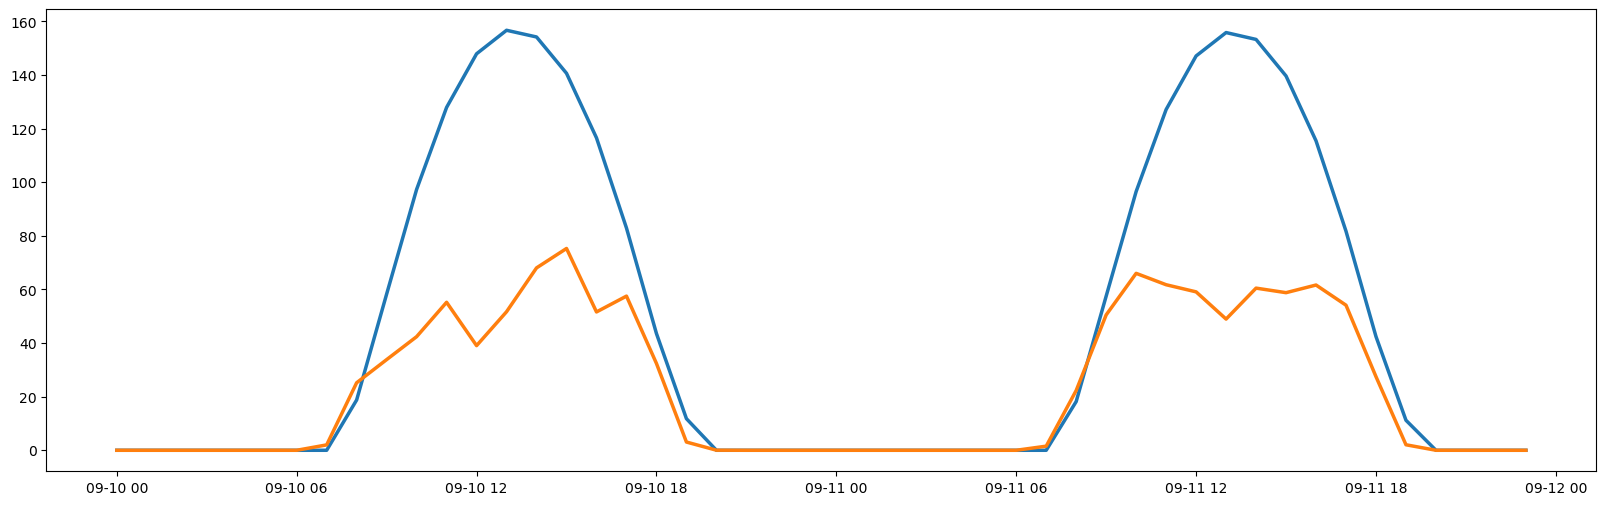

In [47]:
plt.plot(df_pred[:48])
plt.plot(data_frame_roof[:48])
plt.show()

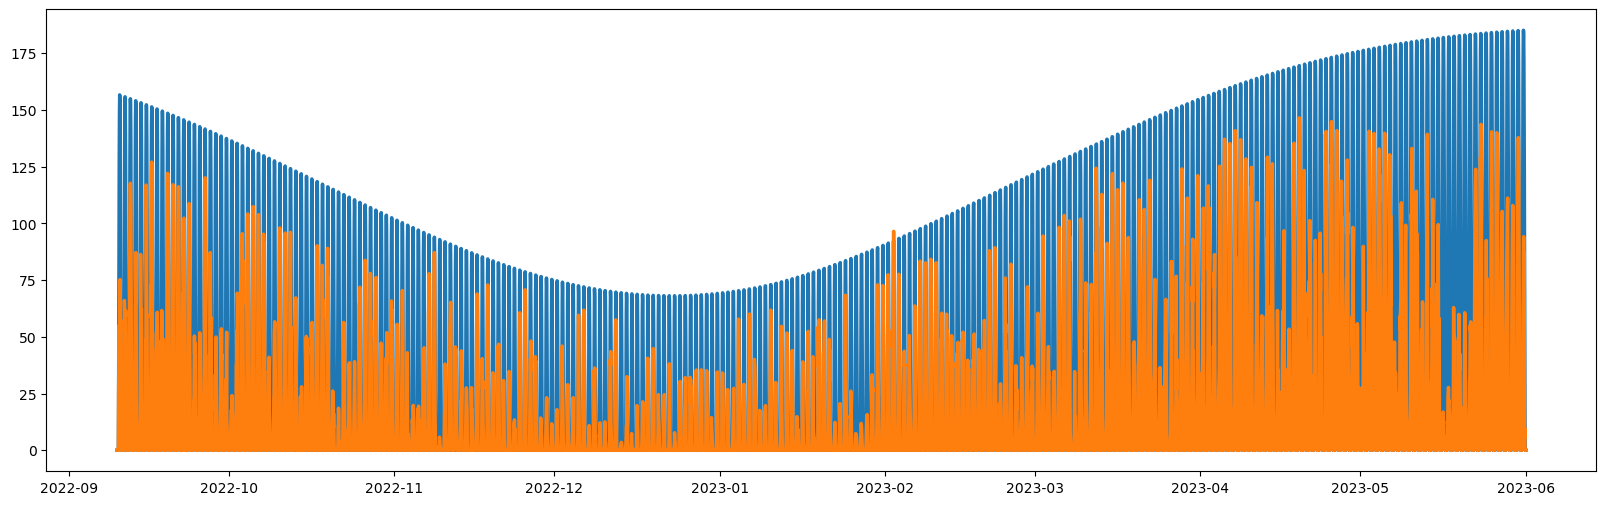

In [48]:
plt.plot(df_pred)
plt.plot(data_frame_roof)
plt.show()

### other model using haurwitz for clear sky

In [49]:
# model_haurwitz = pvlib.clearsky.haurwitz(s_position['apparent_zenith'])
# model_haurwitz

In [50]:
# df_pred = calcule_pred(model_haurwitz, s_position, airmass_a, angle, location )
# pred = df_pred.values

In [51]:
# from sklearn.metrics import mean_squared_error as MSE
# import numpy as np
# testScore = np.sqrt(MSE(real, pred))
# print('Test Score: %.2f RMSE' % (testScore))

In [52]:
# plt.plot(df_pred)
# plt.plot(data_frame_roof)
# plt.show()

### Bird model

In [53]:
# precipitable_water = pvlib.atmosphere.gueymard94_pw(25, 50)

In [54]:
# aod0 = 0.03
# lambda0 = 100
# aod380 = pvlib.atmosphere.angstrom_aod_at_lambda(aod0, lambda0, alpha=1.14, lambda1=380.0)
# aod500 = pvlib.atmosphere.angstrom_aod_at_lambda(aod0, lambda0, alpha=1.14, lambda1=500.0)

In [55]:
# aod380

In [56]:
# aod500

In [57]:
# model_bird = pvlib.clearsky.bird(s_position['zenith'], airmass_r, 0.9, aod500, 1, ozone=0.3, pressure=101325.0, dni_extra=1364.0, asymmetry=0.85, albedo=0.2)

In [58]:
# model_bird

In [59]:
# df_pred = calcule_pred(model_bird, s_position, airmass_a, angle, location )
# pred = df_pred.values
# df_pred

In [60]:
# from sklearn.metrics import mean_squared_error as MSE
# import numpy as np
# testScore = np.sqrt(MSE(real, pred))
# print('Test Score: %.2f RMSE' % (testScore))

In [61]:
# plt.plot(df_pred)
# plt.plot(data_frame_roof)
# plt.show()

## ONDULEUR 

In [62]:
dataframe_onduleur = df_onduleur.copy()

In [63]:
dataframe_onduleur = dataframe_onduleur.loc[dataframe_onduleur.index <= end]
dataframe_onduleur = dataframe_onduleur.loc[dataframe_onduleur.index >= start]

dataframe_onduleur = dataframe_onduleur[dataframe_onduleur <= 1000]
dataframe_onduleur = dataframe_onduleur[dataframe_onduleur != 0]
dataframe_onduleur = dataframe_onduleur.interpolate('pad')



In [64]:
dataframe_onduleur = dataframe_onduleur.resample('1H').mean().interpolate(method='time')
# dataframe_onduleur.loc[dataframe_onduleur['Onduleur A: energie totale (MWh)']==]

In [65]:
dataframe_onduleur.loc["2023-01-05 13:00:00",'Onduleur: energie totale (MWh)'] = dataframe_onduleur.loc["2023-01-05 14:00:00",'Onduleur: energie totale (MWh)']
dataframe_onduleur.loc["2022-12-22 11:00:00",'Onduleur: energie totale (MWh)'] = dataframe_onduleur.loc["2022-12-22 12:00:00",'Onduleur: energie totale (MWh)']


In [66]:
dataframe_onduleur = dataframe_onduleur.diff().fillna(0) #MW
dataframe_onduleur*=1000 # kW

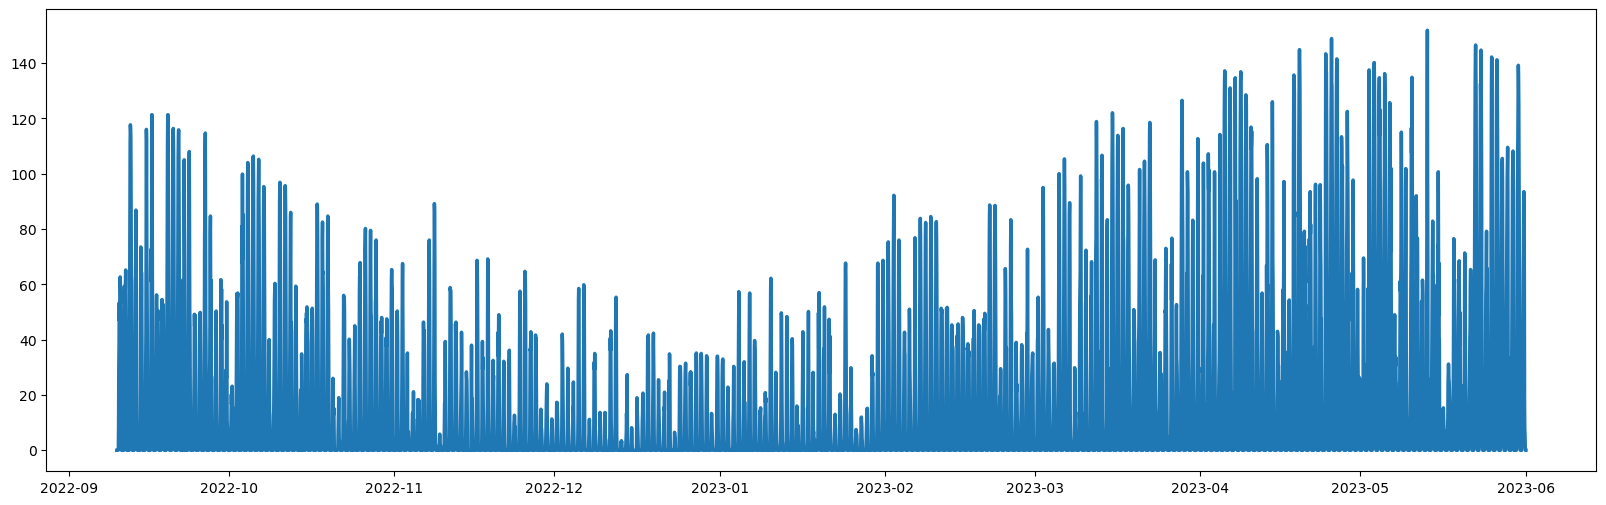

In [67]:
plt.plot(dataframe_onduleur['Onduleur: energie totale (MWh)'])

In [68]:
def onduleur(p_139, p_41, name):
    real = dataframe_onduleur[name].values
    df_pred_139 = calcule_pred(model_ineichen, s_position, airmass_a, angle, location, model_irrad= 'isotropic', power =p_139, angle=139 )
    df_pred_41 = calcule_pred(model_ineichen, s_position, airmass_a, angle, location, model_irrad= 'isotropic', power =p_41, angle=-41 )
    df_pred = df_pred_139+ df_pred_41
    df_pred = df_pred.loc[df_pred.index >= start]
    df_pred = df_pred.loc[df_pred.index <= end]
    df_pred.index = pd.to_datetime(df_pred.index, format ='%Y-%m-%d %H:%M:%S') 
    df_pred =df_pred.tz_convert('Europe/Paris').tz_localize(None)
    pred = df_pred.values
    testScore = np.sqrt(MSE(real, pred))
    print('Test Score: %.2f RMSE' % (testScore))
    print('RMSE en % : ', testScore*100/real.max())
    test_mae = MAE(real, pred) 
    print("MAE : ",test_mae)
    test_mape = MAPE(real, pred) 
    print("MAPE : ",test_mape)
    test_ape = APE(real, pred) 
    print("R2 : ",test_ape)
    plt.plot(df_pred, color = 'orange', label='prediction')
    plt.plot(dataframe_onduleur[name], color = 'blue', label='real')
    plt.title('Difference between computation and reality of ' + name)
    plt.legend()
    plt.show()
    plt.plot(df_pred[:48], color = 'orange', label='prediction')
    plt.plot(dataframe_onduleur[name][:48], color = 'blue', label='real')
    plt.title('Difference between computation and reality of ' + name)
    plt.legend()
    plt.show()
    return df_pred



Onduleur A :

Test Score: 6.24 RMSE
RMSE en % :  16.07702021907923
MAE :  2.9207759342364517
MAPE :  765984313330216.0
R2 :  0.24730924116379638


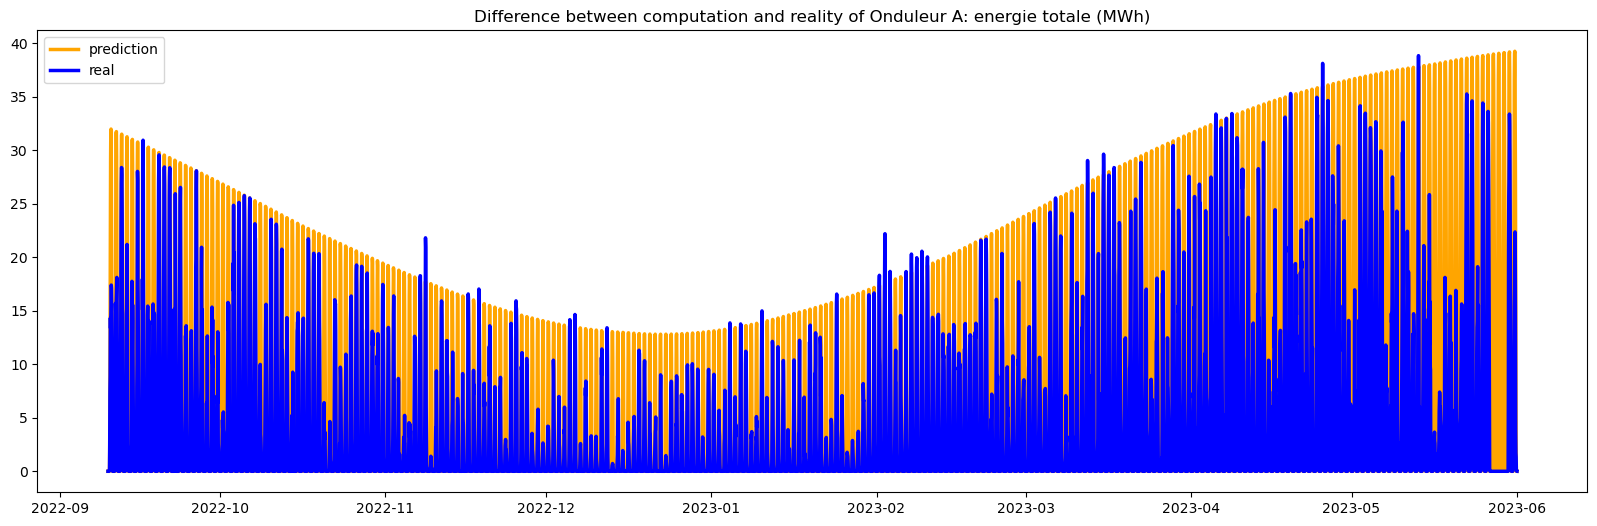

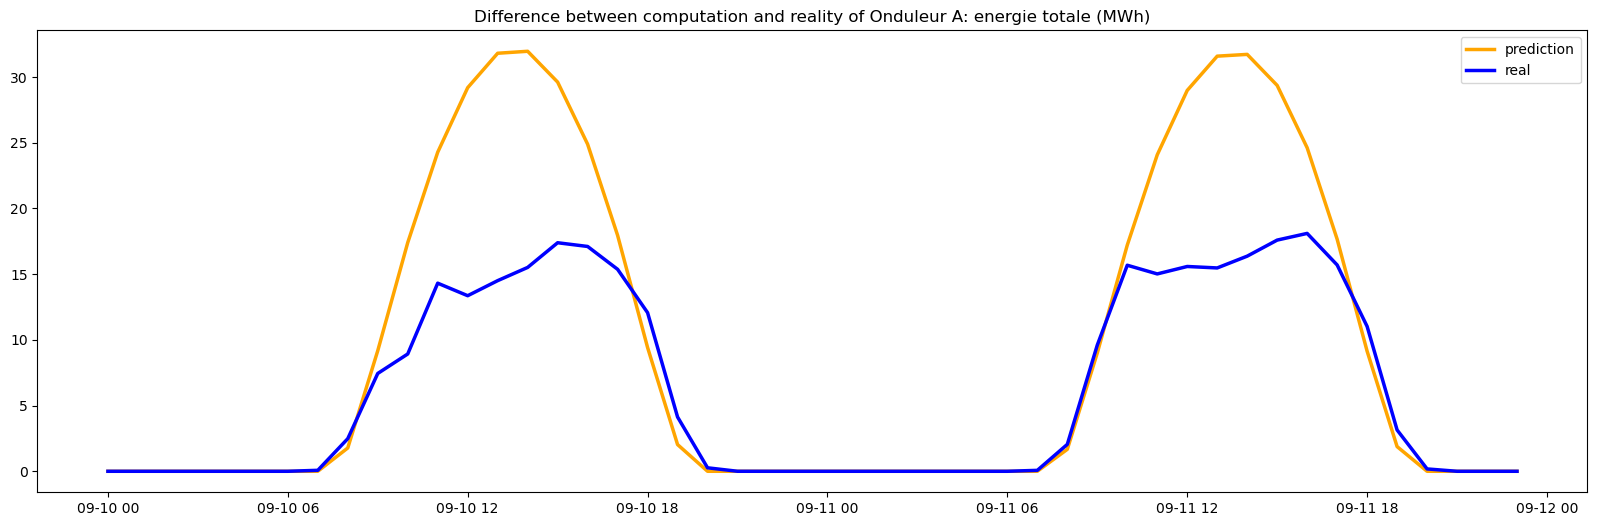

In [69]:
p_139 = 8.1 + 13.77
p_41 = 8.1+14.58

df_pred_a = onduleur(p_139, p_41, 'Onduleur A: energie totale (MWh)')
pred_a = df_pred_a.values

Onduleur B :

Test Score: 23.37 RMSE
RMSE en % :  1.790978636411521
MAE :  2.2741408484014096
MAPE :  36934516916436.19
R2 :  0.020757229111741493


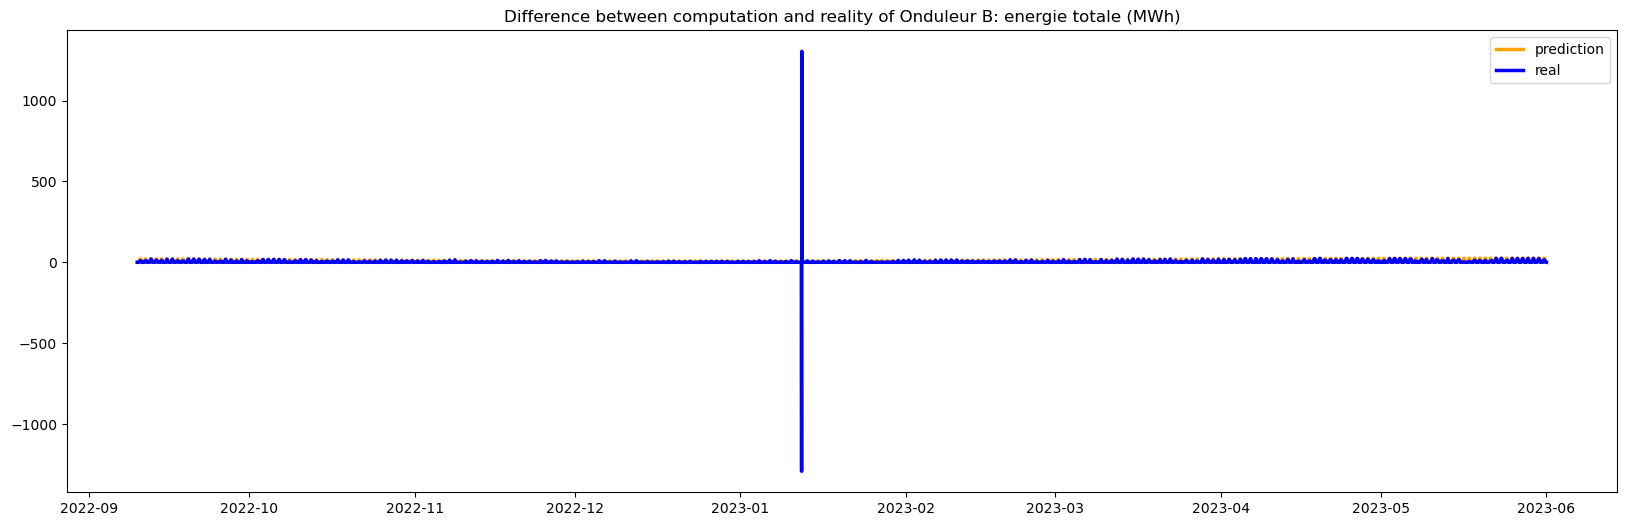

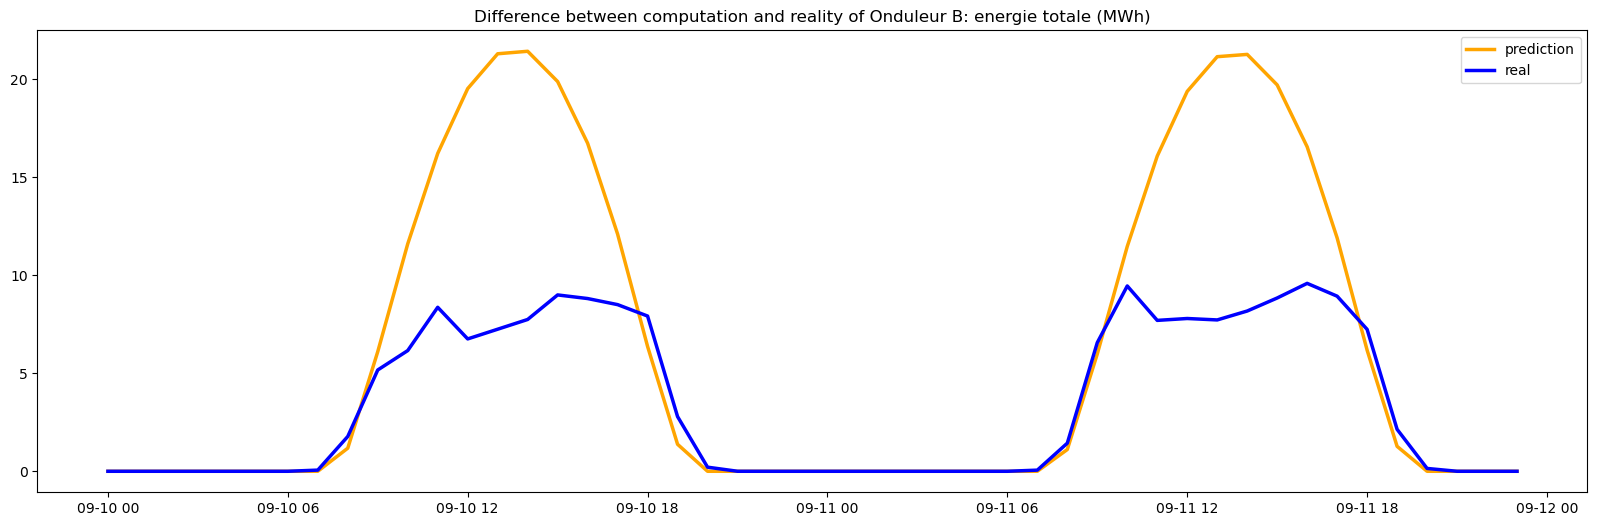

In [70]:
p_139 = 13.77
p_41 = 16.20
df_pred_b = onduleur(p_139, p_41, 'Onduleur B: energie totale (MWh)')
pred_b = df_pred_b.values

Onduleur C : 

Test Score: 6.09 RMSE
RMSE en % :  15.144417374679094
MAE :  2.906915866145552
MAPE :  64039237838411.74
R2 :  0.34180671013792996


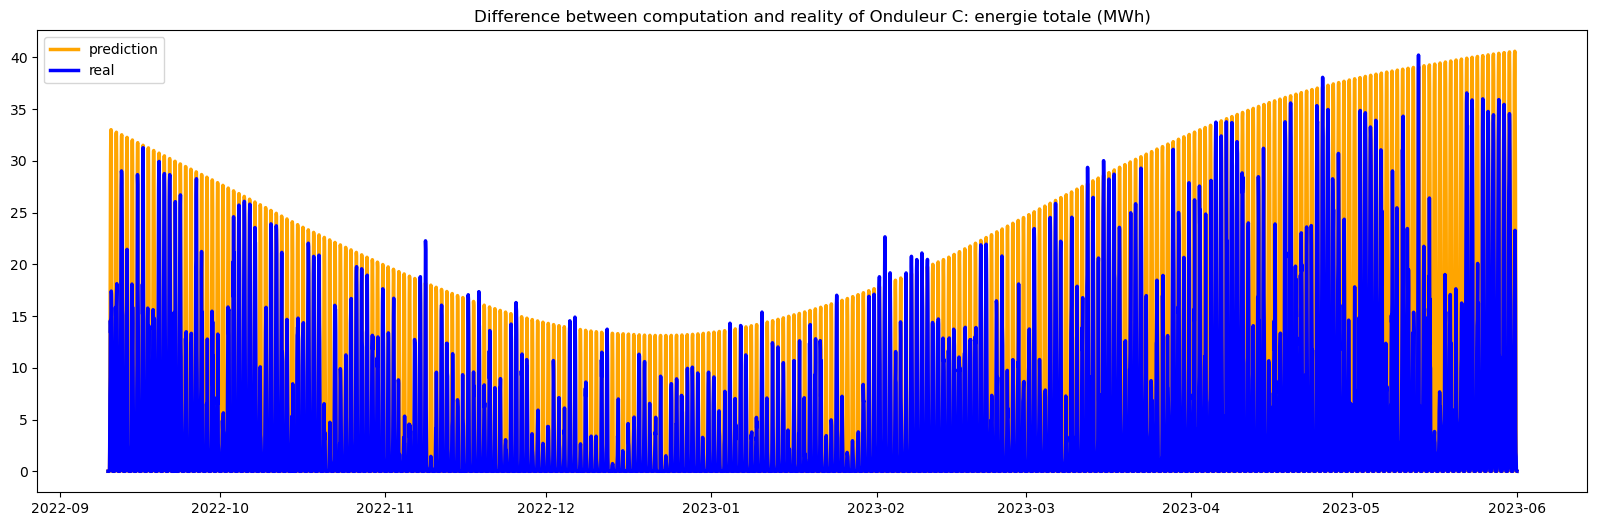

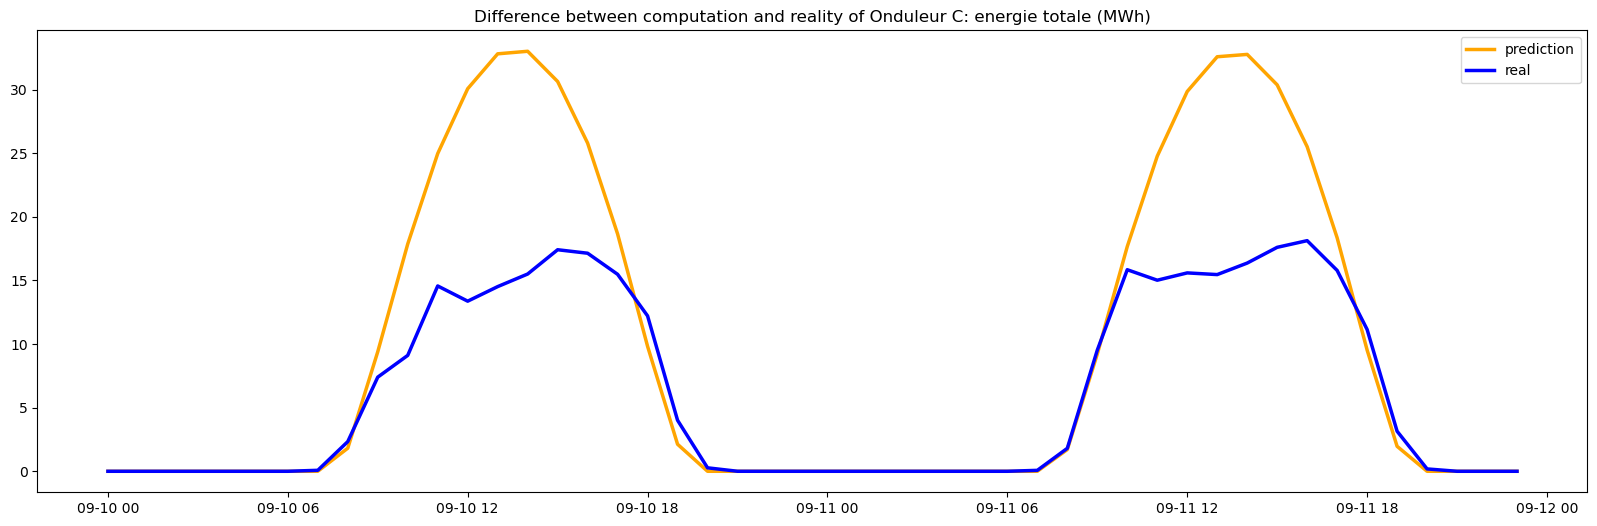

In [71]:
p_139 = 13.77 + 7.29
p_41 = 8.91 + 16.20
df_pred_c = onduleur(p_139, p_41, 'Onduleur C: energie totale (MWh)')
pred_c = df_pred_c.values

Onduleur DA :

Test Score: 4.90 RMSE
RMSE en % :  19.616587489565838
MAE :  2.476256758438637
MAPE :  46384576558847.875
R2 :  0.053424016730600044


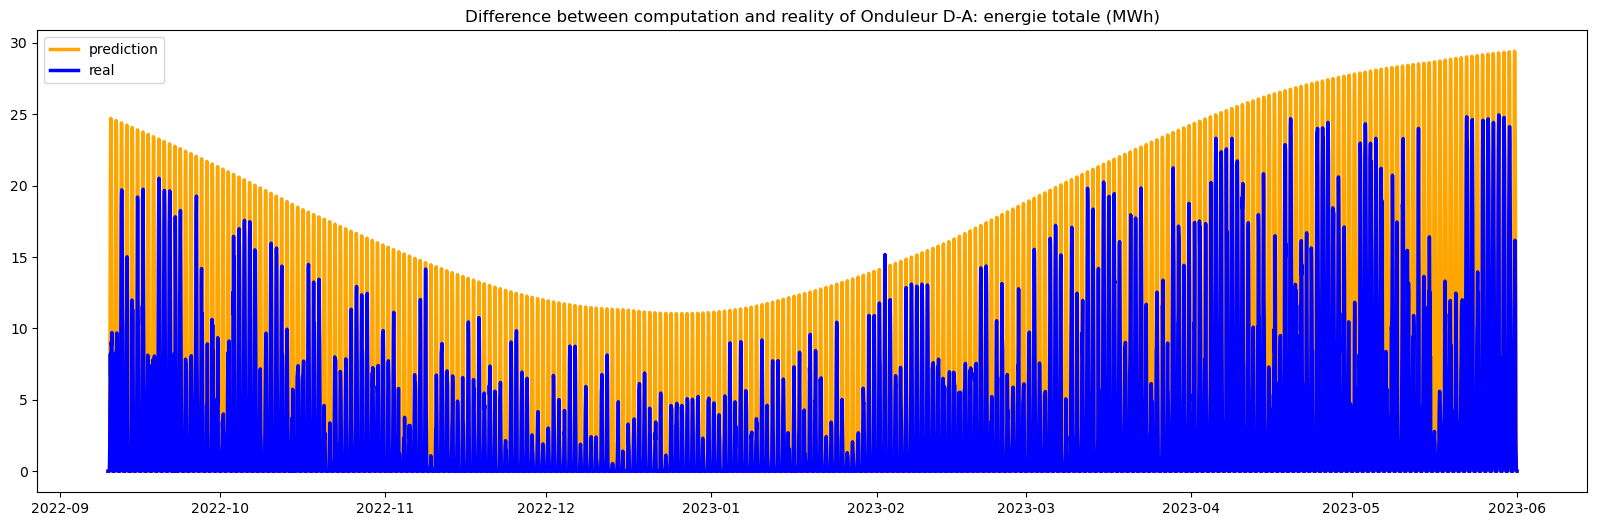

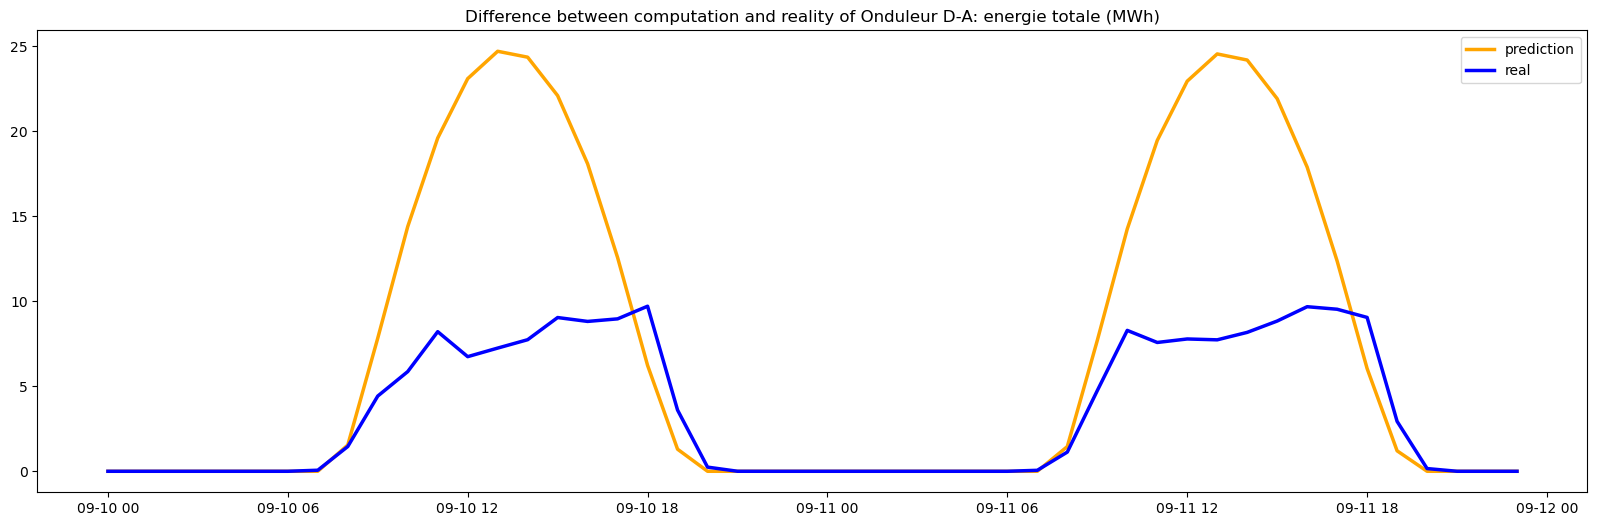

In [72]:
p_139 = 32.4
name = 'Onduleur D-A: energie totale (MWh)'
real = dataframe_onduleur[name].values
df_pred_da = calcule_pred(model_ineichen, s_position, airmass_a, angle, location, model_irrad= 'isotropic', power =p_139, angle=139 )
df_pred_da = df_pred_da.loc[df_pred_da.index >= start]
df_pred_da = df_pred_da.loc[df_pred_da.index <= end]
df_pred_da.index = pd.to_datetime(df_pred_da.index, format ='%Y-%m-%d %H:%M:%S') 
df_pred_da =df_pred_da.tz_convert('Europe/Paris').tz_localize(None)
pred_da = df_pred_da.values
testScore = np.sqrt(MSE(real, pred_da))
print('Test Score: %.2f RMSE' % (testScore))
print('RMSE en % : ', testScore*100/real.max())
test_mae = MAE(real, pred_da) 
print("MAE : ",test_mae)
test_mape = MAPE(real, pred_da) 
print("MAPE : ",test_mape)
test_ape = APE(real, pred_da) 
print("R2 : ",test_ape)
plt.plot(df_pred_da, color = 'orange', label='prediction')
plt.plot(dataframe_onduleur[name], color = 'blue', label='real')
plt.title('Difference between computation and reality of ' + name)
plt.legend()
plt.show()
plt.plot(df_pred_da[:48], color = 'orange', label='prediction')
plt.plot(dataframe_onduleur[name][:48], color = 'blue', label='real')
plt.title('Difference between computation and reality of ' + name)
plt.legend()
plt.show()

Onduleur DB :

Test Score: 40.50 RMSE
RMSE en % :  7.543871762964678
MAE :  3.890574461392349
MAPE :  6719491228229421.0
R2 :  -0.017678536284809088


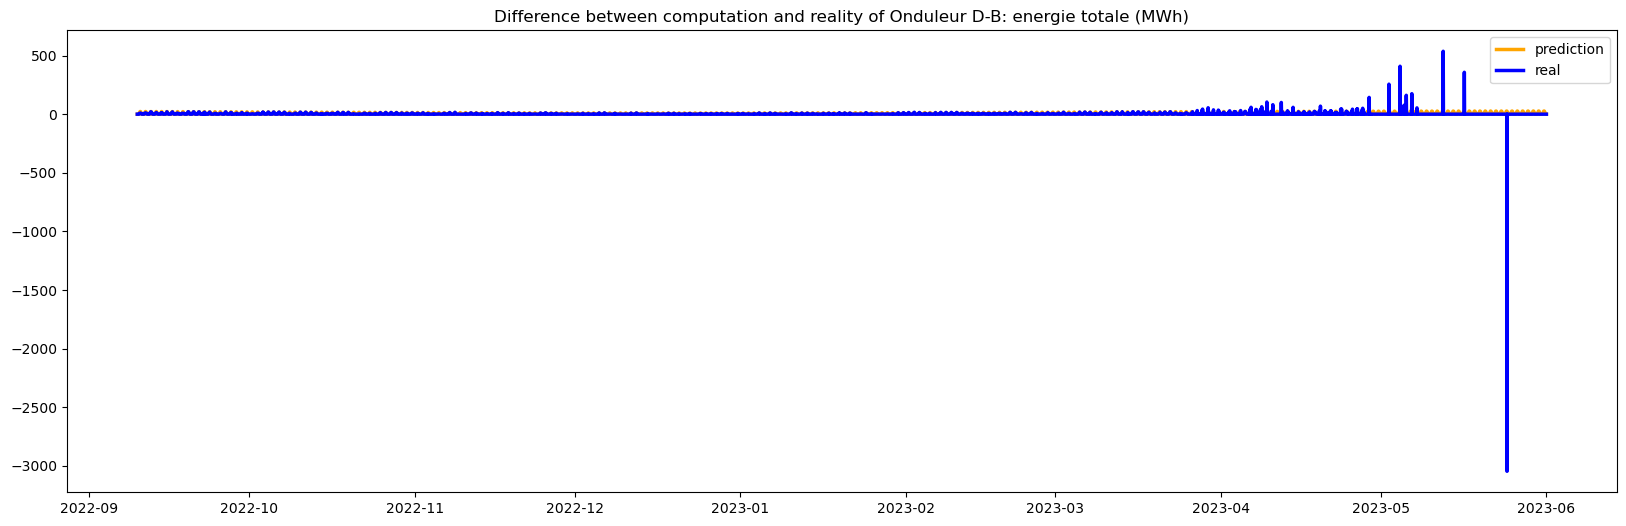

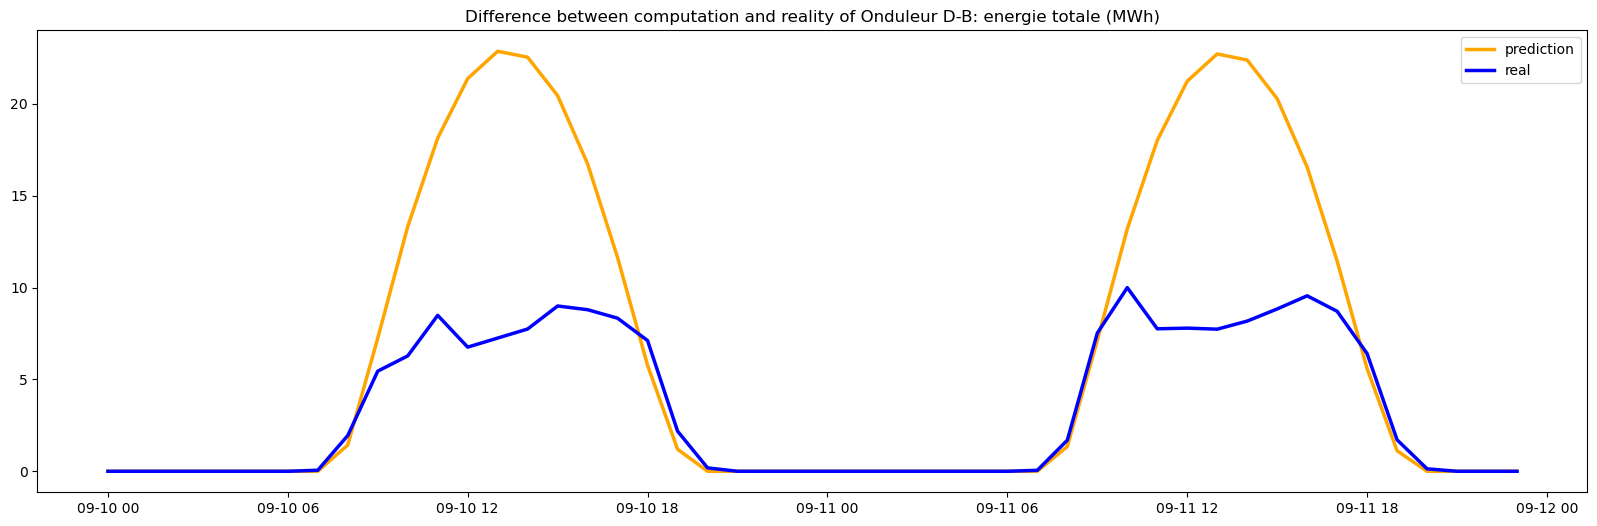

In [73]:
p_41 = 14.58+15.39
name = 'Onduleur D-B: energie totale (MWh)'
real = dataframe_onduleur[name].values
df_pred_db = calcule_pred(model_ineichen, s_position, airmass_a, angle, location, model_irrad= 'isotropic', power =p_41, angle=139 )
df_pred_db = df_pred_db.loc[df_pred_db.index >= start]
df_pred_db = df_pred_db.loc[df_pred_db.index <= end]
df_pred_db.index = pd.to_datetime(df_pred_db.index, format ='%Y-%m-%d %H:%M:%S') 
df_pred_db =df_pred_db.tz_convert('Europe/Paris').tz_localize(None)
pred_db = df_pred_db.values
testScore = np.sqrt(MSE(real, pred_db))
print('Test Score: %.2f RMSE' % (testScore))
print('RMSE en % : ', testScore*100/real.max())
test_mae = MAE(real, pred_db) 
print("MAE : ",test_mae)
test_mape = MAPE(real, pred_db) 
print("MAPE : ",test_mape)
test_ape = APE(real, pred_db) 
print("R2 : ",test_ape)
plt.plot(df_pred_db, color = 'orange', label='prediction')
plt.plot(dataframe_onduleur[name], color = 'blue', label='real')
plt.title('Difference between computation and reality of ' + name)
plt.legend()
plt.show()
plt.plot(df_pred_db[:48], color = 'orange', label='prediction')
plt.plot(dataframe_onduleur[name][:48], color = 'blue', label='real')
plt.title('Difference between computation and reality of ' + name)
plt.legend()
plt.show()

Final pred 

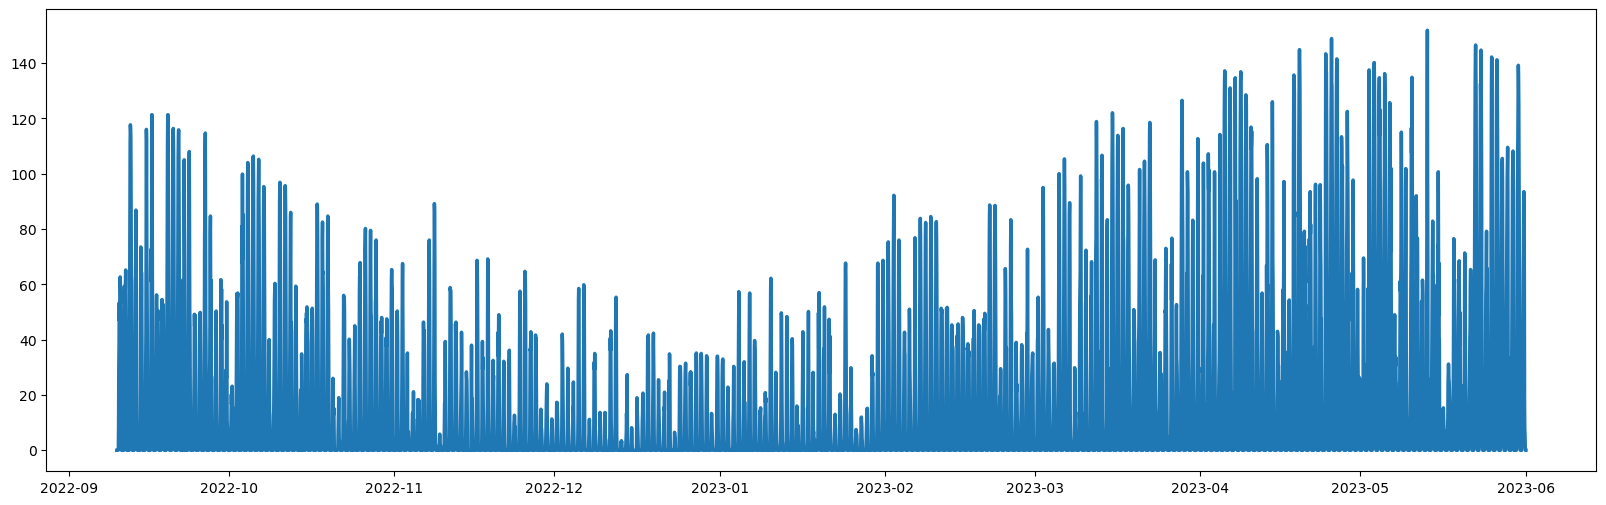

In [74]:
plt.plot(dataframe_onduleur['Onduleur: energie totale (MWh)'])

In [75]:
totale_real = dataframe_onduleur['Onduleur: energie totale (MWh)'].values

In [76]:
df_final = df_pred_a + df_pred_b +df_pred_c+df_pred_da+df_pred_db

In [77]:
totale_pred = pred_a + pred_b + pred_c + pred_da + pred_db

Test Score: 25.17 RMSE
RMSE en % :  16.575774073256177
MAE :  12.17850260552448
MAPE :  514389668280688.0
R2 :  0.2813981898448771


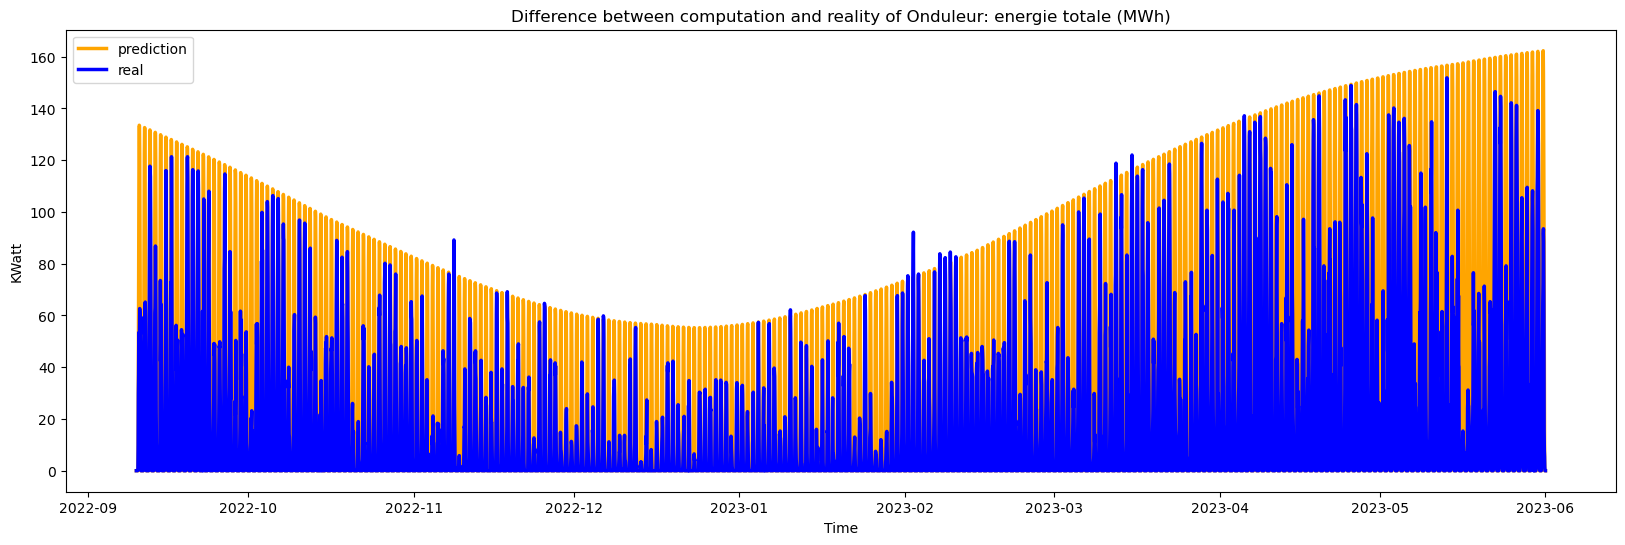

In [78]:
testScore = np.sqrt(MSE(totale_real, totale_pred))
print('Test Score: %.2f RMSE' % (testScore))
print('RMSE en % : ', testScore*100/totale_real.max())
test_mae = MAE(totale_real, totale_pred) 
print("MAE : ",test_mae)
test_mape = MAPE(totale_real, totale_pred) 
print("MAPE : ",test_mape)
test_ape = APE(totale_real, totale_pred) 
print("R2 : ",test_ape)
plt.plot(df_final, color = 'orange', label='prediction')
plt.plot(dataframe_onduleur['Onduleur: energie totale (MWh)'], color = 'blue', label='real')
plt.title('Difference between computation and reality of Onduleur: energie totale (MWh)')
plt.ylabel('KWatt')
plt.xlabel('Time')
plt.legend()
plt.show()

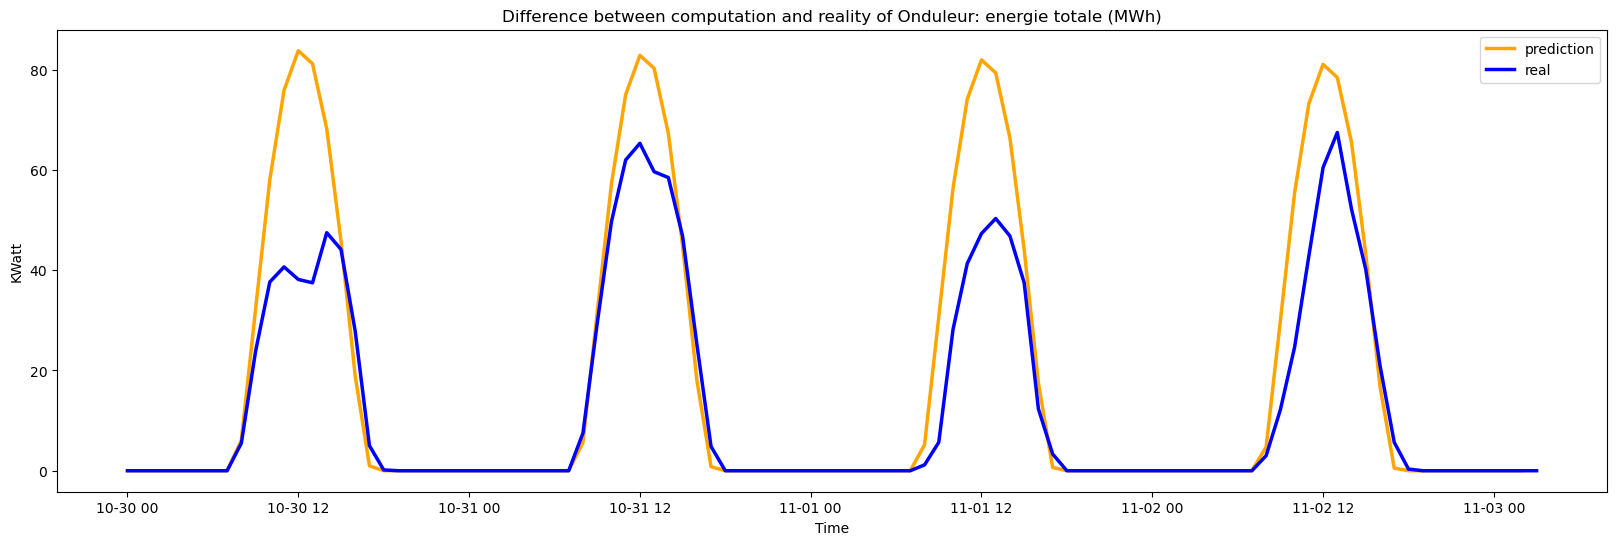

In [79]:
plt.plot(df_final[1200:1300], color = 'orange', label='prediction')
plt.plot(dataframe_onduleur['Onduleur: energie totale (MWh)'][1200:1300], color = 'blue', label='real')
plt.title('Difference between computation and reality of Onduleur: energie totale (MWh)')
plt.ylabel('KWatt')
plt.xlabel('Time')
plt.legend()
plt.show()

In [80]:
# df_final.to_csv('pred_roof_cs_inverters.csv')

dans le mod physique remplacer au de chaque partie par les du toit 
et neb --> neb .csv 

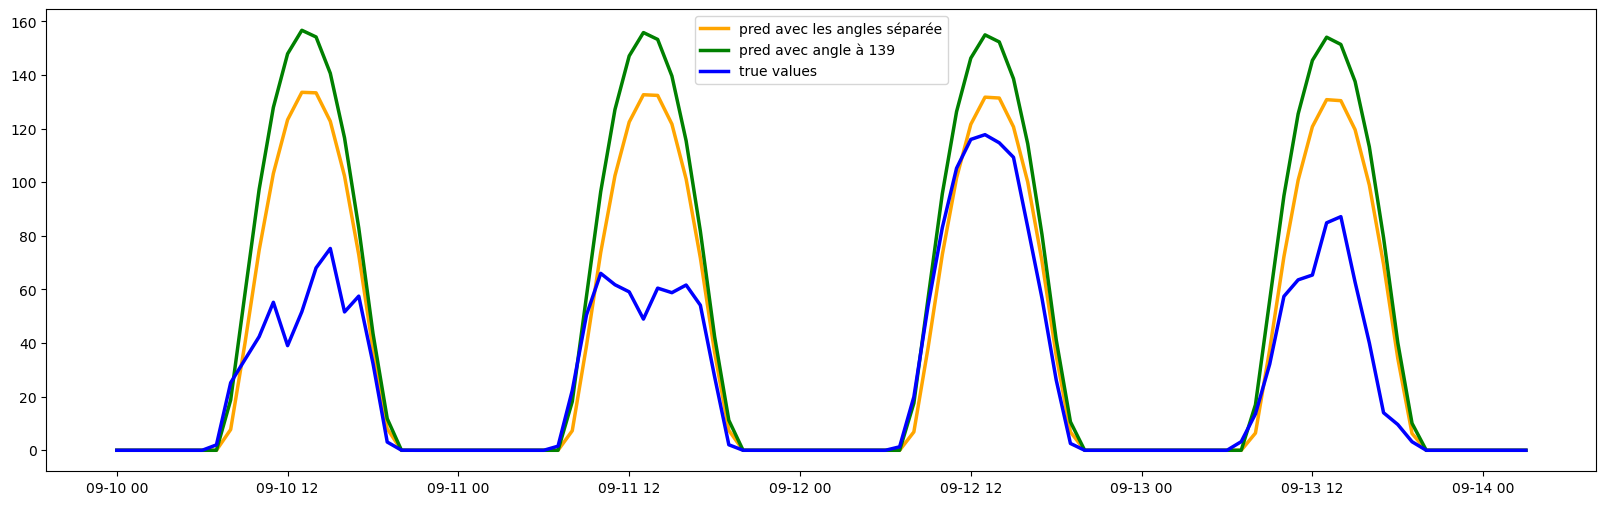

In [81]:

plt.plot(df_final[:100], label = 'pred avec les angles séparée', color = 'orange')
plt.plot(df_pred[:100], label='pred avec angle à 139', color = 'green')
plt.plot(data_frame_roof[:100], label = 'true values ', color = 'blue')
plt.legend()
plt.show()

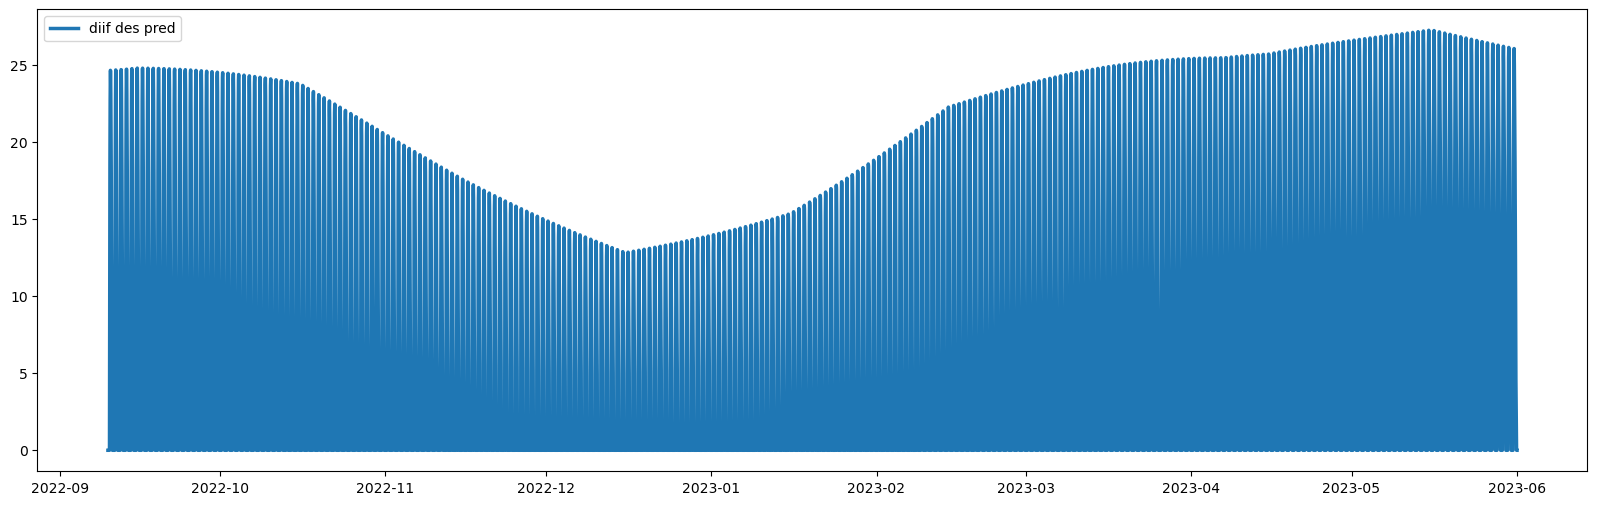

In [82]:
plt.plot(df_pred - df_final, label='diif des pred')
# plt.plot(df_final, label = 'pred avec les angles séparée')
plt.legend()
plt.show()